# Works in napari environment

In [1]:
from pathlib import Path
import h5py
import napari
import matplotlib.pyplot as plt

In [5]:
data_dir = Path(r'\\allen\programs\mindscope\workgroups\learning\ophys\zdrift\container_1255965420\experiment_1209386661')
oeid = data_dir.name.split('_')[-1]
data_fn = data_dir / f'{oeid}_segment_fov.h5'
with h5py.File(data_fn, 'r') as h:
    data = h['data'][()]
viewer = napari.Viewer()
viewer.add_image(data, name=oeid)


<Image layer '1209386661' at 0x240eed746a0>

In [42]:
first_last_fn = data_dir / f'{oeid}_first_last_mean_fov.h5'
with h5py.File(first_last_fn, 'r') as h:
    data_fl = h['data'][()]

In [43]:
viewer.add_image(data_fl[0], name='first 500 frames')
viewer.add_image(data_fl[1], name='last 500 frames')

<Image layer 'last 500 frames' at 0x1da05cf0850>

In [7]:
zstack_fn = data_dir / f'{oeid}_zstack_reg.h5'
with h5py.File(zstack_fn, 'r') as h:
    zstack = h['data'][()]
viewer = napari.Viewer()
viewer.add_image(zstack, name=f'{oeid}_zstack')

<Image layer '1209386661_zstack' at 0x24080078d30>

In [23]:
oeid

'865798237'

<KeysViewHDF5 ['corrcoef', 'corrcoef_pre', 'matched_plane_indices', 'ops', 'ref_oeid', 'ref_zstack_crop', 'rigid_tmat', 'segment_fov_registered', 'segment_fov_registered_pre', 'translation_shift']>


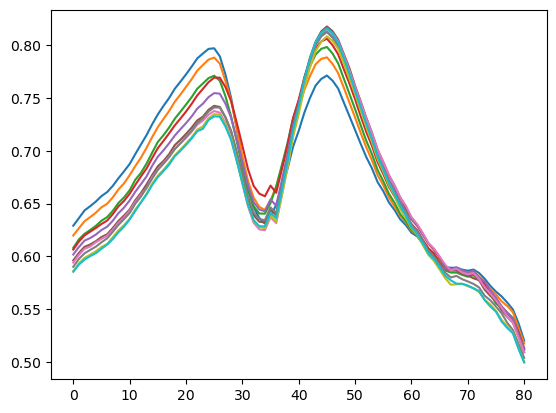

In [6]:
zdrift_fn = data_dir / f'{oeid}_zdrift_ref_{oeid}.h5'
with h5py.File(zdrift_fn, 'r') as h:
    print(h.keys())
    # zdrift = h['data'][()]
    matched_plane_indices = h['matched_plane_indices'][()]
    corrcoef = h['corrcoef'][()]
    segment_fov_registered = h['segment_fov_registered'][()]
    translation_shift = h['translation_shift'][()]
    rigid_tmat = h['rigid_tmat'][()]
    ref_zstack_crop = h['ref_zstack_crop'][()]
fig, ax = plt.subplots()
for i in range(corrcoef.shape[0]):
    ax.plot(corrcoef[i,:])


<KeysViewHDF5 ['corrcoef', 'corrcoef_pre', 'matched_plane_indices', 'ops', 'ref_oeid', 'ref_zstack_crop', 'rigid_tmat', 'segment_fov_registered', 'segment_fov_registered_pre', 'translation_shift']>


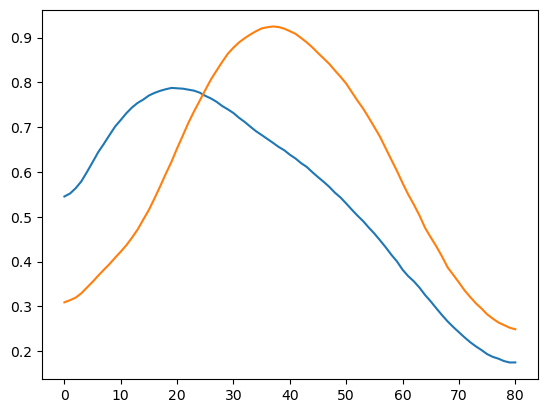

In [47]:
zdrift_fn = data_dir / f'{oeid}_zdrift_ref_{oeid}_first_last.h5'
with h5py.File(zdrift_fn, 'r') as h:
    print(h.keys())
    # zdrift = h['data'][()]
    matched_plane_indices = h['matched_plane_indices'][()]
    corrcoef = h['corrcoef'][()]
    segment_fov_registered = h['segment_fov_registered'][()]
    translation_shift = h['translation_shift'][()]
    rigid_tmat = h['rigid_tmat'][()]
    ref_zstack_crop = h['ref_zstack_crop'][()]
fig, ax = plt.subplots()
for i in range(corrcoef.shape[0]):
    ax.plot(corrcoef[i,:])



In [25]:
matched_plane_indices

array([39, 39, 39, 39, 40, 39, 39, 38], dtype=int64)

In [17]:
viewer = napari.Viewer()
viewer.add_image(ref_zstack_crop)

<Image layer 'ref_zstack_crop' at 0x16ea0170700>

In [16]:
rigid_tmat

array([[[ 9.99999449e-01,  1.04989748e-03, -1.31929540e-01],
        [-1.04989748e-03,  9.99999449e-01,  1.93472558e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],

       [[ 9.99999438e-01,  1.06048897e-03, -1.44245763e-01],
        [-1.06048897e-03,  9.99999438e-01,  2.12725818e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],

       [[ 9.99999531e-01,  9.68356990e-04, -1.17024423e-01],
        [-9.68356990e-04,  9.99999531e-01,  1.86827361e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],

       [[ 9.99999539e-01,  9.60598201e-04, -6.19676461e-02],
        [-9.60598201e-04,  9.99999539e-01,  2.18944608e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],

       [[ 9.99999727e-01,  7.39168108e-04,  1.23285560e-01],
        [-7.39168108e-04,  9.99999727e-01,  2.40608426e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],

       [[ 9.99999699e-01,  7.76008632e-04,  1.28385812e-02],
        [-7.76